# Visualizing the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show

In [3]:
fullTimeTable = pd.read_pickle('D:/MTA/fullTimeTable.pickle')
fullTimeTable.head()

In [4]:
fullTimeTable.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'resetEntries', 'resetExits',
       'New Entries by Time Block', 'New Exits by Time Block', 'hourNum',
       'proportion', 'hiddenEntsNextDay', 'hiddenExitsNextDay', 'index',
       'Total Daily Entries', 'Total Daily Exits', 'Total Daily Rides',
       'Trains', 'Latitude', 'Longitude', 'Coordinates', 'Borough', '1', '2',
       '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'J', 'L',
       'M', 'N', 'Q', 'R', 'S', 'W', 'Date', 'datetime', 'Weekday', 'Holiday',
       'Avg Temperature', 'Precipitation', 'ClosestStation',
       'distToClosestStation'],
      dtype='object')

In [114]:
topFiveStations=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].sum().sort_values(ascending=False)[0:5]
topTenStations=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].sum().sort_values(ascending=False)[0:10]
topTwentyStations=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].sum().sort_values(ascending=False)[0:20]
topFiftyStations=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].sum().sort_values(ascending=False)[0:50]
topHundredStations=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].sum().sort_values(ascending=False)[0:100]

In [5]:
topFiveStations.index

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '23 ST', '34 ST-HERALD SQ',
       'TIMES SQ-42 ST'],
      dtype='object', name='STATION')

### Scatter Plot to Check for Outliers

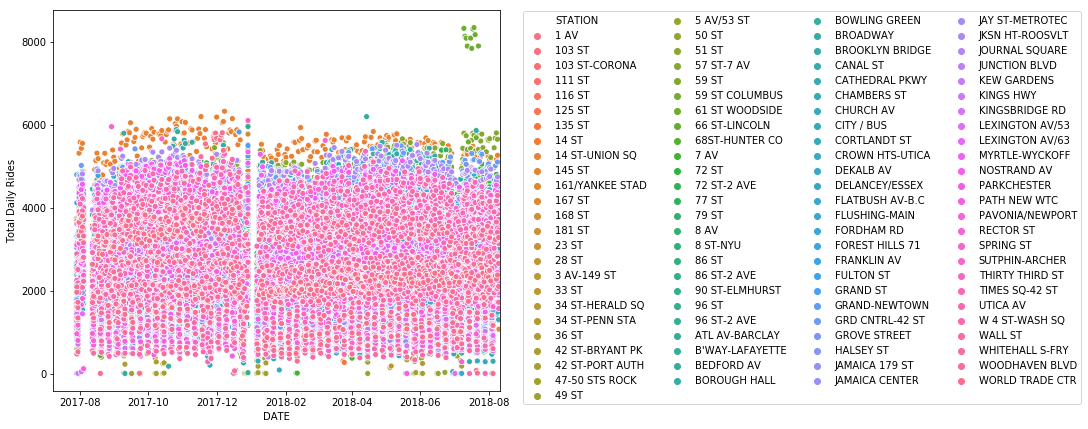

In [152]:
ts=fullTimeTable[fullTimeTable['STATION'].isin(topHundredStations.index)].groupby(['STATION','DATE'])['Total Daily Rides'].mean().reset_index()
plt.figure(figsize=(8,7))
sns.scatterplot(x='DATE',y='Total Daily Rides',hue='STATION',data=ts)
plt.xlim([pd.Timestamp('2017-07-08'), pd.Timestamp('2018-08-11')])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, ncol=4)
plt.show()

In [154]:
ts[ts['Total Daily Rides']>7000]

,STATION,DATE,Total Daily Rides
11609,61 ST WOODSIDE,2018-07-10,8317.5625
11610,61 ST WOODSIDE,2018-07-11,8127.0625
11611,61 ST WOODSIDE,2018-07-12,8081.5000
11612,61 ST WOODSIDE,2018-07-13,7889.4375
11615,61 ST WOODSIDE,2018-07-16,8082.1250
11616,61 ST WOODSIDE,2018-07-17,7835.1875
11617,61 ST WOODSIDE,2018-07-18,8300.0625
11618,61 ST WOODSIDE,2018-07-19,8335.7500
11619,61 ST WOODSIDE,2018-07-20,8164.3125
11622,61 ST WOODSIDE,2018-07-23,7891.6250


### Distribution Plot of how much Daily Total of Turnstile Swipes for a Device Varies

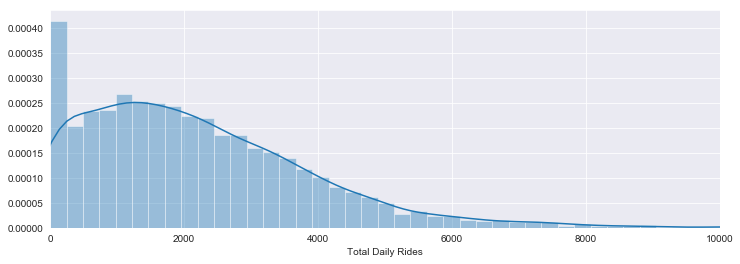

In [178]:
plt.figure(figsize=(12,4))
plt.xlim([0,10000])
sns.distplot(fullTimeTable.groupby(['STATION','UNIT','SCP'])['Total Daily Rides'].mean(),bins=50)
plt.show()

### Distribution Plot of how new entries/exits by block can vary By Hour Number

In [197]:
ts2=fullTimeTable[fullTimeTable['STATION'].isin(topHundredStations.index)].fillna(0).groupby(['hourNum','STATION'])[['New Entries by Time Block','New Exits by Time Block']].mean().reset_index()

In [219]:
plt.clf()

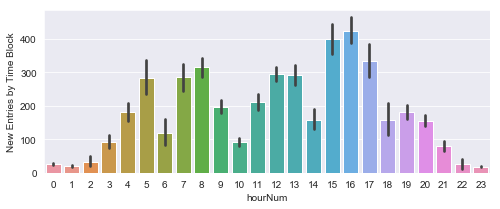

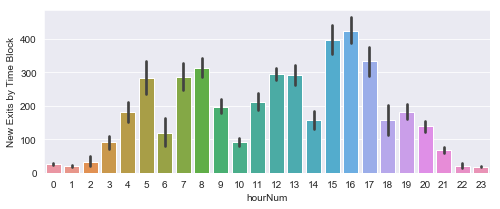

In [225]:
plt.figure(figsize=(8,3))
plt.xlim([-1,23])
#plt.subplots(2, 1, sharex=True)
sns.barplot(x='hourNum',y='New Entries by Time Block',data=ts2)
plt.show()
plt.figure(figsize=(8,3))
sns.barplot(x='hourNum',y='New Exits by Time Block',data=ts2)
plt.show()

### Group by Station Total Rides overall Bar Graph, top 15

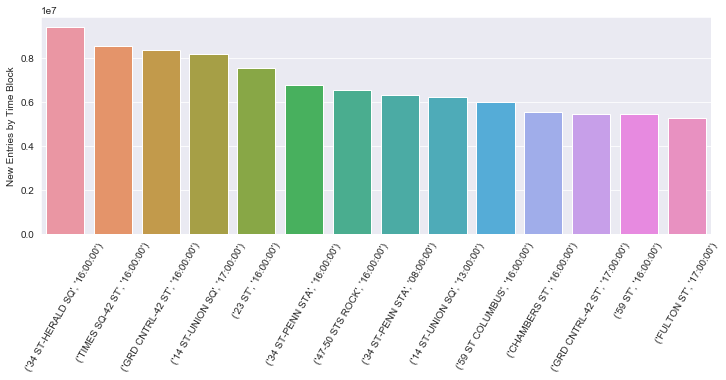

In [232]:
plt.figure(figsize=(12,4))
sns.barplot(x=fullTimeTable.groupby(['STATION','TIME'])['New Entries by Time Block'].sum().sort_values(ascending=False)[0:14].index, 
            y=fullTimeTable.groupby(['STATION','TIME'])['New Entries by Time Block'].sum().sort_values(ascending=False)[0:14])
plt.xticks(rotation=60)
plt.show()

### Group by Station Highest Mean 'Total Daily Rides' Over ALL DAYS

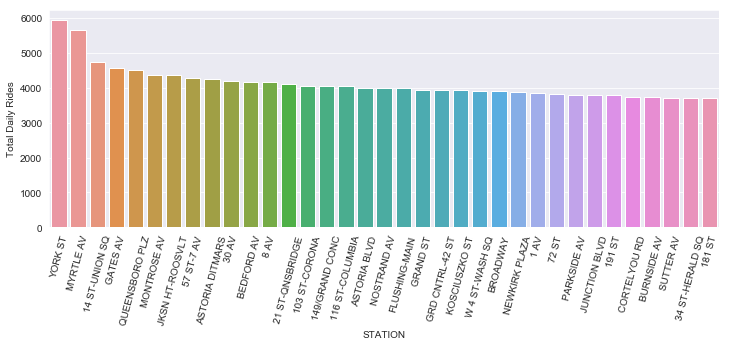

In [235]:
plt.figure(figsize=(12,4))
sns.barplot(x=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].mean().sort_values(ascending=False)[0:35]
.index, y=fullTimeTable.groupby(['STATION'])['Total Daily Rides'].mean().sort_values(ascending=False)[0:35])
plt.xticks(rotation=75)
plt.show()

### Comparing Entries by Time Block in an Average Day (Top 20 Stations)

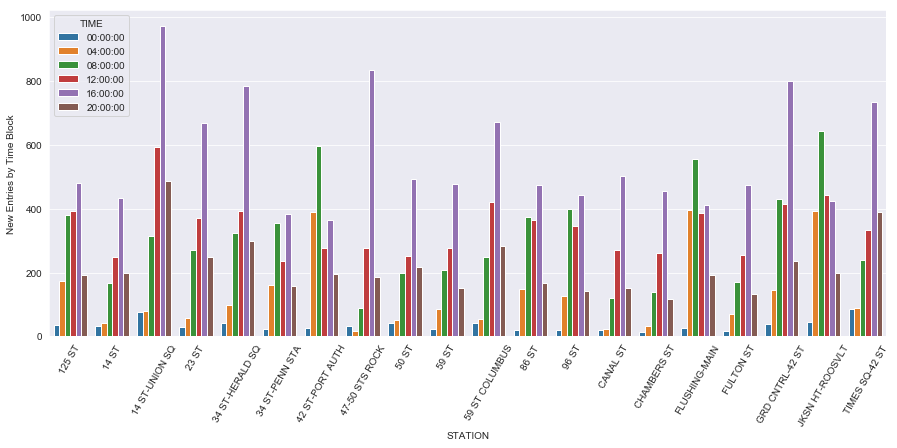

In [237]:
topTimes=fullTimeTable['TIME'].value_counts()[0:6].index
stationNTimeBlock = fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)&(fullTimeTable['TIME'].isin(topTimes))].groupby(['STATION','TIME'])[['New Entries by Time Block','New Exits by Time Block']].mean().reset_index()
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x='STATION',y='New Entries by Time Block',data=stationNTimeBlock,hue='TIME')
plt.xticks(rotation=60)
plt.show()

### How much of the day's counts tend to be in a certain time block? (On Average, for the Top 20 Stations)

In [289]:
from collections import Counter
from math import pi
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import output_notebook

output_notebook()
timeBlocks=fullTimeTable['TIME'].value_counts()[0:6].index
meansByBlock=fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)&(fullTimeTable['TIME'].isin(timeBlocks))].groupby(['STATION','TIME'])['New Entries by Time Block'].mean()

meansByBlock=meansByBlock.groupby(level=1).mean().reset_index().rename(columns={'New Entries by Time Block':'value'})

meansByBlock['angle'] = meansByBlock['value']/meansByBlock['value'].sum()  * 2*pi
meansByBlock['color'] = Category20c[len(meanTimeBlockProps)]

p = figure(plot_height=350, title="Each Hour Block's Mean Share of the Day", toolbar_location=None,
           tools="hover", tooltips="@TIME: @value")

p.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='TIME', source=meansByBlock)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None
show(p)

Loading BokehJS ...

### Top 10 Station' Mean (Mon-Fri) Ridership over a Year

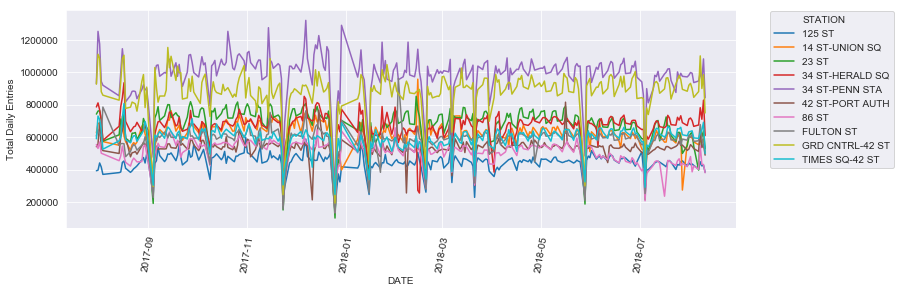

In [295]:
#NOT STATURDAY OR SUNDAY
topTenOverTime = fullTimeTable[fullTimeTable['STATION'].isin(topTenStations.index)&(fullTimeTable['Weekday']!='Saturday')&(fullTimeTable['Weekday']!='Sunday')].groupby(['STATION','DATE'])['Total Daily Entries'].sum().reset_index()
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(x='DATE',y='Total Daily Entries',hue='STATION',data=topTenOverTime)
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.show()

### Top 10 Stations' Mean Ridership by Weekday

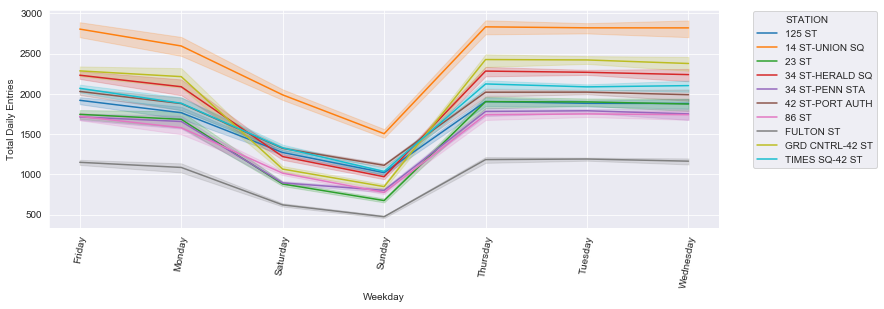

In [296]:
from datetime import datetime
from dateutil.parser import parse

topTenByWeekday = fullTimeTable[fullTimeTable['STATION'].isin(topTenStations.index)].groupby(['STATION','DATE'])['Total Daily Entries'].mean().reset_index()
topTenByWeekday['Weekday'] = topTenByWeekday['DATE'].dt.weekday_name

sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(x='Weekday',y='Total Daily Entries',hue='STATION',data=topTenByWeekday)
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.show()

### Top 10 Stations' Mean Ridership by Month

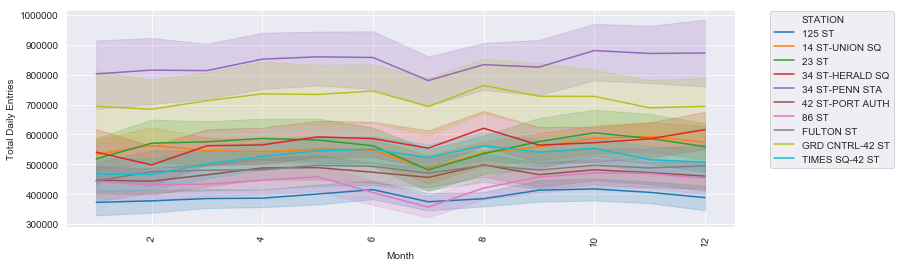

In [297]:
from datetime import datetime
from dateutil.parser import parse

topTenByMonth = fullTimeTable[fullTimeTable['STATION'].isin(topTenStations.index)].groupby(['STATION','DATE'])['Total Daily Entries'].sum().reset_index()
topTenByMonth['Month'] = topTenByMonth['DATE'].dt.month

sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(x='Month',y='Total Daily Entries',hue='STATION',data=topTenByMonth)
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.show()

## Heatmap: Weekday and Ridership

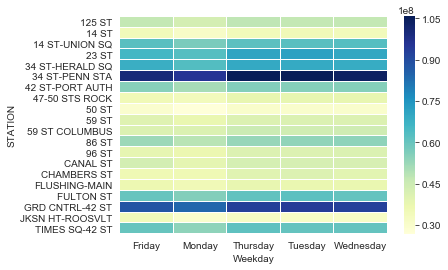

In [298]:
hm1_group=fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)].groupby(['STATION','Weekday'])['Total Daily Rides'].sum().sort_values(ascending=False).reset_index()
heat = hm1_group.pivot('STATION','Weekday','Total Daily Rides')
heat=heat.drop(['Saturday','Sunday'],axis=1)
sns.heatmap(heat,cmap="YlGnBu",linewidth=0.005)
plt.show()

## Heatmap: Month and Ridership

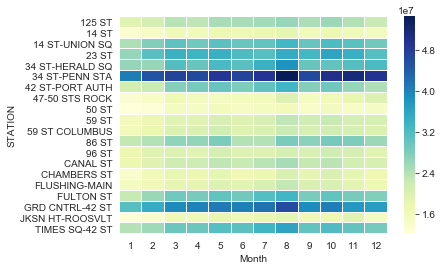

In [94]:
fullTimeTable['Month'] = fullTimeTable['DATE'].dt.month
hm5_group=fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)].groupby(['STATION','Month'])['Total Daily Rides'].sum().reset_index()
heat5 = hm5_group.pivot('STATION','Month','Total Daily Rides')
sns.heatmap(heat5,cmap="YlGnBu",linewidth=0.005)
plt.show()

## Heatmap: Time and Ridership 

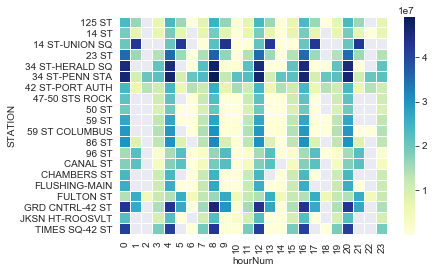

In [303]:
hm4_group=fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)].groupby(['STATION','hourNum'])['Total Daily Rides'].sum().reset_index()
heat4 = hm4_group.pivot('STATION','hourNum','Total Daily Rides')
sns.heatmap(heat4,cmap="YlGnBu",linewidth=0.005)
plt.show()

## Heatmap: Temperature and Ridership

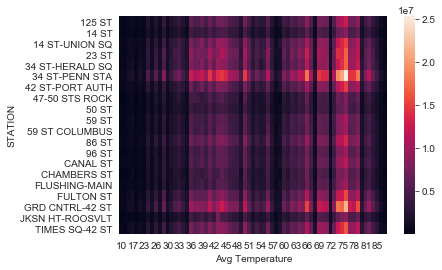

In [101]:
hm6_group=fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)].groupby(['STATION','Avg Temperature'])['Total Daily Rides'].sum().reset_index()
heat6 = hm6_group.pivot('STATION','Avg Temperature','Total Daily Rides')
sns.heatmap(heat6)
plt.show()

## Heatmap: Precipitation and Ridership

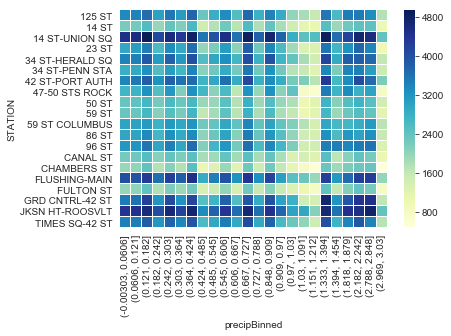

In [132]:
fullTimeTable.loc[fullTimeTable['Precipitation']=='T','Precipitation']=np.nan
fullTimeTable['Precipitation']=fullTimeTable['Precipitation'].astype(float)
fullTimeTable['precipBinned']=pd.cut(fullTimeTable['Precipitation'], 50)
hm7_group=fullTimeTable[fullTimeTable['STATION'].isin(topTwentyStations.index)].groupby(['STATION','precipBinned'])['Total Daily Rides'].mean().reset_index()
heat7 = hm7_group.pivot('STATION','precipBinned','Total Daily Rides')
sns.heatmap(heat7,cmap="YlGnBu",linewidth=0.005)
plt.show()

# To be continued...

# The following tasks are still under construction:

- Heatmap: Distance to Station by Ridership Correlation
- Heatmap: The Borough Area and Ridership
- Heatmap: Train Availability and Ridership
- Heatmap: Coordinate Location and Ridership
- Joint Kernel Density Estimate
- Bar Graph: Mean Total Daily Rides in those that have E vs F, etc.
- Swarm Plot, Strip plots, Violin Plots
- Kernel Density Estimation for Bivariate analysis of daily taxi rides v.s. train totals
- Construct train and test data with the engineered features.
- Run a Random Forest Algorithm.
- Decision on Station
- Are we sure? Examine the station's behavior over extended time series.
- Decision on Weekday
- Decision on Time Block
- Conclusion
- Extendable Applications